In [310]:
## Importing all the neccessary liabraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored

In [311]:
## Reading the dataset
data=pd.read_csv('cars_price.csv')
## Saving a copy of the original data
data1=data

## Printing the first 3 rows of the dataset
data.head()

Unnamed: 0   Brand  Year  Km_Driven    Fuel  Model Location      Price
0           0  Maruti  2011  53,055 km  Petrol  Swift   Mysore  ₹3,64,399
1           1  Maruti  2011  45,719 km  Petrol   Ritz   Mysore  ₹3,35,899
2           2  Maruti  2017   4,588 km  Petrol  Swift   Mysore  ₹5,83,699
3           3  Maruti  2017  13,973 km  Petrol  Swift   Mysore  ₹5,51,499
4           4  Maruti  2017  37,756 km  Diesel  Dzire   Mysore  ₹6,83,699

In [312]:
## Dropping the 'Unnamed: 0' column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [313]:
## Checking the dimensions of data
print('Number of Columns: ',data.shape[1])
print('Number of Rows/Observations: ',data.shape[0])

Number of Columns:  7
Number of Rows/Observations:  5001


In [314]:
## Checking for columns with numeric datatype
print(colored('columns with numeric data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include=['int64','float64','int32']).columns)

print(colored('Num of columns with numeric data: ',attrs=['bold','underline'],color='green'))
print(len(data.select_dtypes(include=['int64','float64','int32']).columns))

columns with numeric data: 
Index(['Year'], dtype='object')
Num of columns with numeric data: 
1


In [315]:
## Checking for columns with object datatype
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include=['object']).columns)

print(colored('Num of columns with object data: ',attrs=['bold','underline'],color='green'))
print(len(data.select_dtypes(include=['object']).columns))

columns with object data: 
Index(['Brand', 'Km_Driven', 'Fuel', 'Model', 'Location', 'Price'], dtype='object')
Num of columns with object data: 
6


- We have 6 features of which 5 store object type data and 1 ('Year') stores numeric data.
- 'Price' is our target and stores object type data.

In [316]:
## Checking for missing values in the dataset
data.isna().sum()

Brand        0
Year         0
Km_Driven    0
Fuel         0
Model        0
Location     0
Price        0
dtype: int64

- We have no missing values in the datset.

In [317]:
## Dropping ',' and '₹' from 'Price' and then converting in to numeric (float) datatype
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = data['Price'].str.replace('₹', '')

data['Price'] = data['Price'].astype('float')

In [318]:
## Checking the datatype
data['Price'].dtype

dtype('float64')

In [319]:
## Dropping ',' and 'km' from 'Km_Driven' and then converting in to numeric (float) datatype
data['Km_Driven'] = data['Km_Driven'].str.replace(',', '')
data['Km_Driven'] = data['Km_Driven'].str.replace('km', '')

data['Km_Driven'] = data['Km_Driven'].astype('float')

In [320]:
## Checking the datatype
data['Km_Driven'].dtype

dtype('float64')

-  Successfully changed coverted 'Price' and 'Km_Driven' to numeric form.

In [321]:
## Creating new feature 'Age' (of the car) using feature 'Year'
data['Age']=2021-data['Year']

In [322]:
## Dropping the variable 'Year'
data.drop('Year',axis=1, inplace=True)

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      5001 non-null   object 
 1   Km_Driven  5001 non-null   float64
 2   Fuel       5001 non-null   object 
 3   Model      5001 non-null   object 
 4   Location   5001 non-null   object 
 5   Price      5001 non-null   float64
 6   Age        5001 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 273.6+ KB


# Exploratory Data Analysis

<font color='red'>

### Feature: Brand

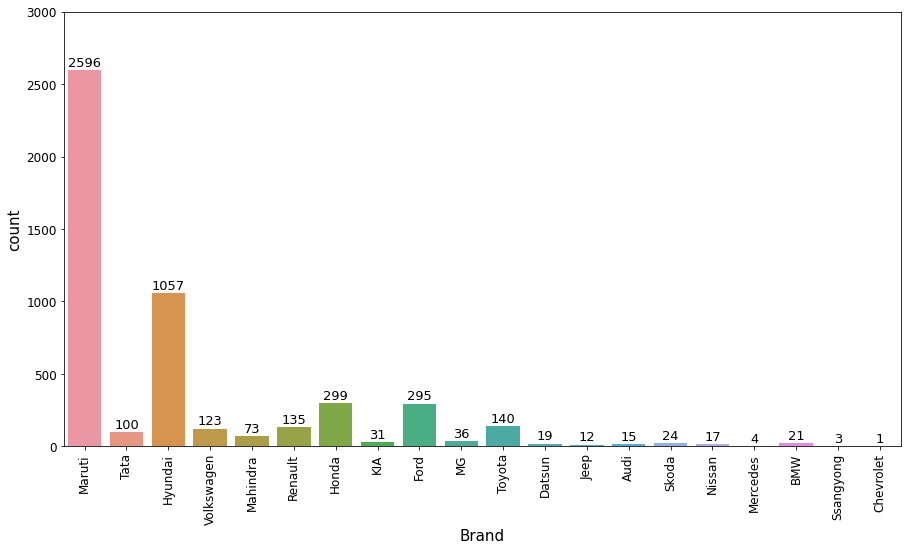

In [324]:
plt.figure(figsize=(15,8))
plt.ylim(0,3000)
plt.xticks(rotation=90)
ax=sns.countplot(data['Brand'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+200), ha='center', va='top', color='black', size=13)
plt.show()

- Brand 'Maruti' has most cars listed for reselling followed by 'Hyundai'.

Text(0, 0.5, 'Price')

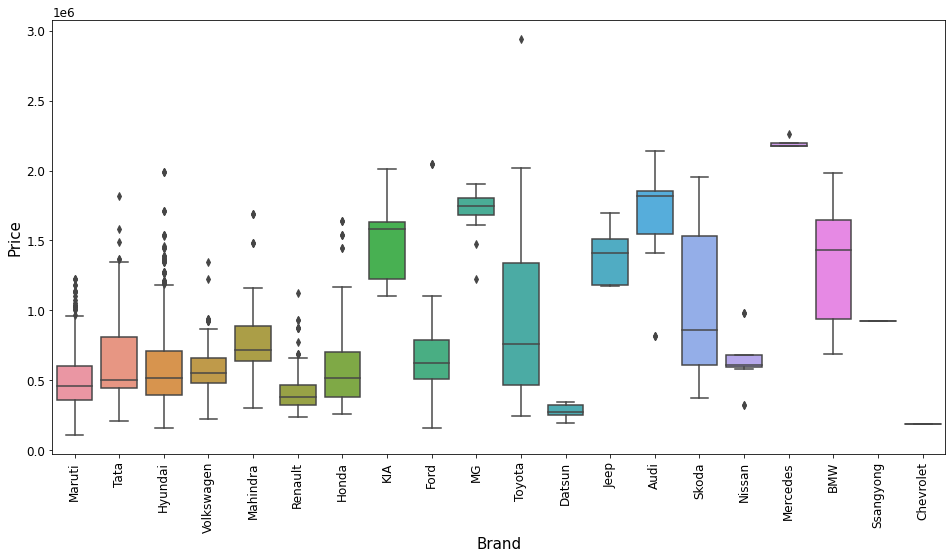

In [240]:
plt.figure(figsize=(16,8))
sns.boxplot(data['Brand'],data['Price'])
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')

- 'Kia', 'MG', 'Jeep', 'Audi', 'Mercedes' and 'BMW' brands have higher resale price compared to other brands which is obvious as these brands usually make high value luxary cars.

<font color='red'>

### Feature: Km_Driven

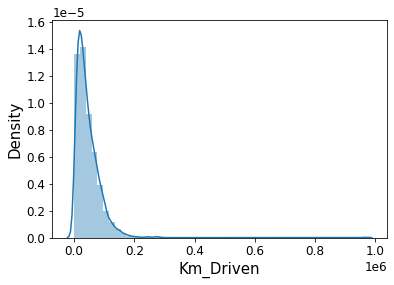

In [241]:
## Checking the distribution
sns.distplot(data['Km_Driven'])

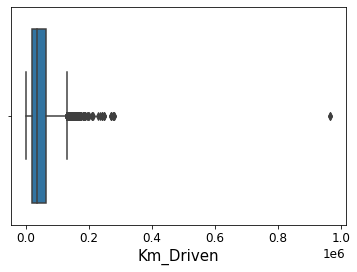

In [242]:
## Checking for outliers using box_plot
sns.boxplot(data['Km_Driven'])

- - Km_Driven shows very high positive skewness and lot of outliers

Text(0.5, 0, 'Km_Driven')

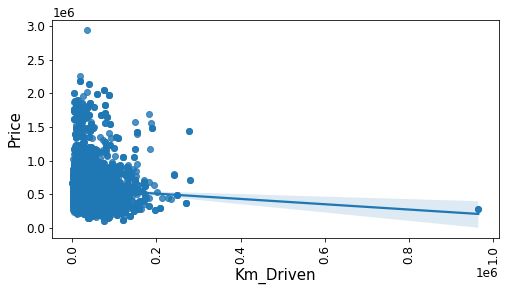

In [243]:
## Checking the relationship between 'Km_Driven' and target 'Price'
plt.figure(figsize=(8,4))
sns.regplot(data['Km_Driven'],data['Price'])
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Km_Driven')

- 'Km_Driven' shows very small negative relationship with the 'Price'.

<font color='red'>

### Feature: Fuel

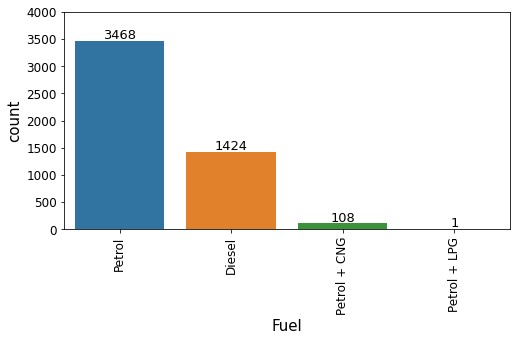

In [244]:
## Checking the frequency of differnt categories in 'Fuel'
plt.figure(figsize=(8,4))
plt.ylim(0,4000)
plt.xticks(rotation=90)
ax=sns.countplot(data['Fuel'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='top', color='black', size=13)
plt.show()

- Most of the listed cars run on 'Petrol' followed by 'Diesel'.

Text(0.5, 0, 'Price')

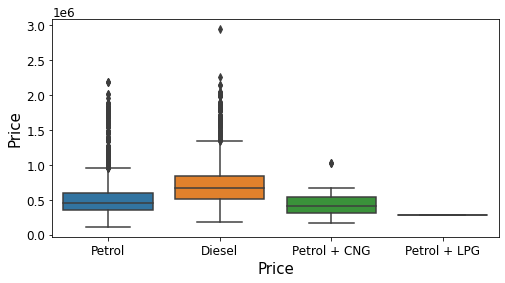

In [245]:
## Checking the relationship between 'Fuel' and target 'Price'
plt.figure(figsize=(8,4))
sns.boxplot(data['Fuel'],data['Price'])

plt.xlabel('Brand')
plt.xlabel('Price')

- Cars which use 'Diesel' have higher reselling 'Price' compared to the cars which run on other fuels.

<font color='red'>

### Feature: Location

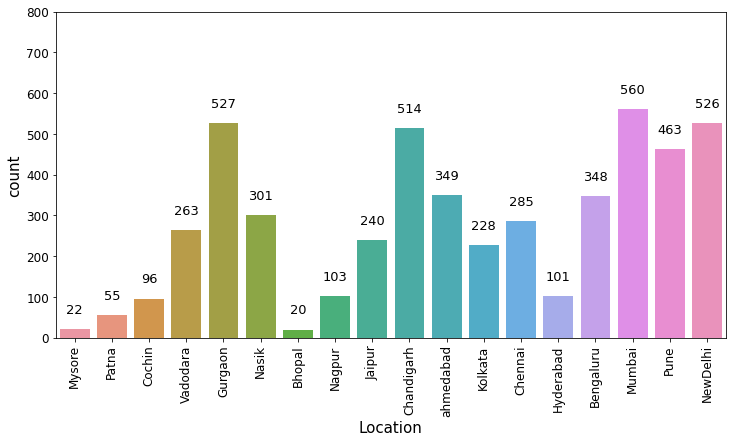

In [325]:
## Checking the frequency of different locations
plt.figure(figsize=(12,6))
plt.ylim(0,800)
plt.xticks(rotation=90)
ax=sns.countplot(data['Location'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='black', size=13)
plt.show()

Text(0, 0.5, 'Price')

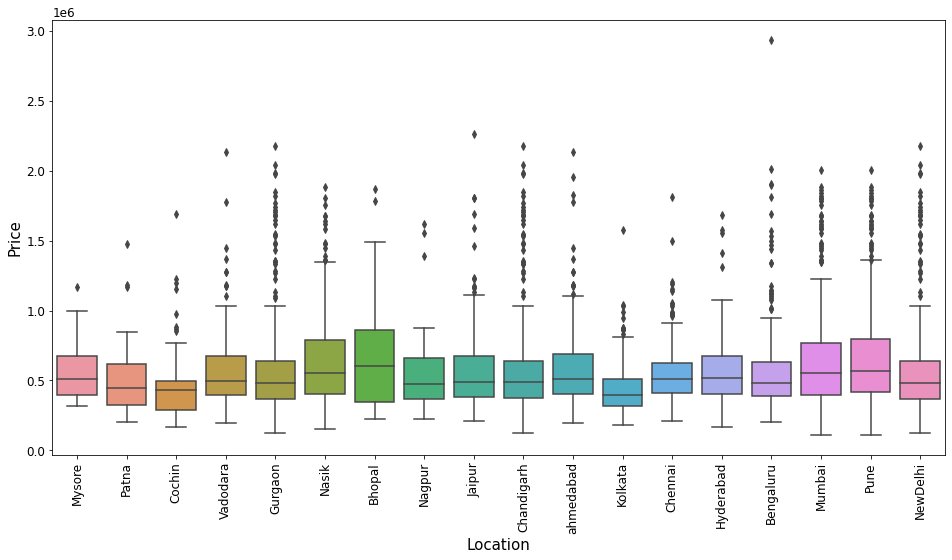

In [326]:
## Checking the relationship between 'Location' and target 'Price'
plt.figure(figsize=(16,8))
sns.boxplot(data['Location'],data['Price'])
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Price')

- Resale price of the cars is relatively low at Cochin and Kolkata locations compared to other locations

<font color='red'>

### Feature: Age

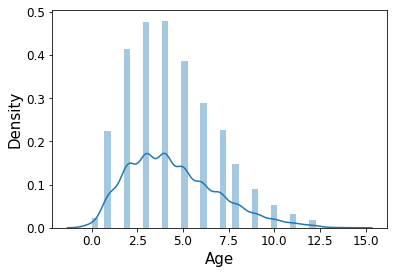

In [249]:
## Checking the distribution 
sns.distplot(data['Age'])

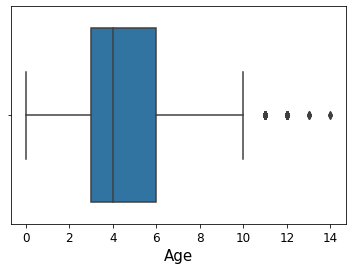

In [250]:
## Checking for outliers using box_plot
sns.boxplot(data['Age'])

- 'Age' is positively skewed and has outliers

Text(0, 0.5, 'Price')

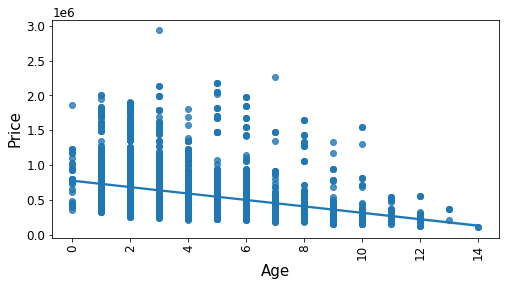

In [251]:
plt.figure(figsize=(8,4))
sns.regplot(data['Age'],data['Price'])
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Price')

- 'Age' shows negative relationship with the 'Price' i.e. the reselling price of the cars decreases with the increase in their 'Age'

### Outliers Treatment

In [252]:
# rejecting data beyond 3 std to limit outliers
from scipy.stats import zscore

z_score=zscore(data[['Km_Driven','Age']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
data1=data[filtering_entry]

data1.shape

(4918, 7)

In [253]:
## Checking the data loss after removing the outliers
data_loss=((5001-data1.shape[0])/5001)*100
data_loss

1.6596680663867227

- We are losing areound 1.65% data which is acceptable

### Skewness detection and treatment in continuous numerical features

In [254]:
data['Km_Driven'].skew()

5.818525460442646

- 'Km_Driven' shows very high skewness.

In [255]:
## Applying cube root transformation to reduce the skewness
data['Km_Driven']=np.cbrt(data['Km_Driven'])

In [256]:
data['Km_Driven'].skew()

0.2319283192927202

- Successfully reduced the skewness in 'Km_Driven'

In [139]:
data['Age'].skew()

0.6886775887646602

In [257]:
## Applying square root transformation to reduce the skewness in 'Age'
data['Age']=np.sqrt(data['Age'])

In [258]:
data['Age'].skew()

-0.1319915497264789

- Successfully reduced the skewness in 'Age'

<font color='red'>

### Encoding the object type data using LabelEncoder

In [259]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='O':
        data[i]=le.fit_transform(data[i])

In [260]:
print(colored('Num of columns with object data: ',attrs=['bold','underline'],color='green'))
print(len(data.select_dtypes(include=['object']).columns))

Num of columns with object data: 
0


- Successfully encoded all the object type data

### Seperating the features and the label

In [261]:
X=data.drop('Price',axis=1)
y=data['Price']

## Feature Selection using SelectKBest and f_regression Scoring

In [262]:
## Importing SelectKBest and f_classif scoring
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [263]:
selectbest=SelectKBest(score_func=f_regression,k=6)
selectbest.fit(X,y)

SelectKBest(k=6, score_func=<function f_regression at 0x00000133CD689E50>)

In [264]:
## Saving the scores and the feature names in dataframes
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(X.columns)

In [265]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores=feature_scores.nlargest(6,'Scores')
feature_scores

Features      Scores
5        Age  780.416568
2       Fuel  591.832762
1  Km_Driven   29.874771
0      Brand   25.719295
3      Model   11.631211
4   Location    9.105956

- 'Age' and 'Fuel' affect 'Price' the most.
- Will not drop any features as we already have limited number of features.

### Scaling the features using StandardScaler

In [266]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Seperating the data in training and testing sets in 75:25 proportion

In [267]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

### Importing regression performance metrics

In [268]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

## Model 1: Linear Regression

In [269]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [270]:
## Training the model
lr.fit(X_train,y_train)

LinearRegression()

In [271]:
## Predicting the output for test set
y_lr=lr.predict(X_test)

In [272]:
## R2 score for Linear Regression model
lr_score=r2_score(y_test,y_lr)
lr_score

0.3055050930760532

In [273]:
## Cross Validation score for lr model
lr_cvs=cross_val_score(lr,X_scaled,y,cv=5).mean()
lr_cvs

0.25396617519813675

In [274]:
## Root mean squred error for lr model
lr_rmse=np.sqrt(mean_squared_error(y_test,y_lr))
lr_rmse

247335.60940239957

In [275]:
## Root mean absolute error for lr model
lr_rmae=np.sqrt(mean_absolute_error(y_test,y_lr))
lr_rmae

399.229263948755

## Model 2: KNeighborsRegressor

In [276]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

In [277]:
## Using Grid Search CV to select best K value

from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

model = GridSearchCV(knr, params, cv=5)

model.fit(X_train,y_train)

model.best_params_

{'n_neighbors': 4}

In [278]:
knr=KNeighborsRegressor(n_neighbors=4)

In [279]:
## Training the model
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [280]:
## Predicting the output for test set
y_knr=knr.predict(X_test)

In [281]:
## R2 score for knr model
knr_score=r2_score(y_test,y_knr)
knr_score

0.5940977376089476

In [283]:
## Cross Validation score for knr model
knr_cvs=cross_val_score(knr,X_scaled,y,cv=5).mean()
knr_cvs

0.605055849720841

In [284]:
## Root mean squred error for knr model
knr_rmse=np.sqrt(mean_squared_error(y_test,y_knr))
knr_rmse

189087.51331910005

In [285]:
## Root mean absolute error for knr model
knr_rmae=np.sqrt(mean_absolute_error(y_test,y_knr))
knr_rmae

337.1667363094129

## Model 3: Decision Tree regressor

In [286]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [287]:
## Training the model
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [288]:
## Predicting the output for test set
y_dtr=dtr.predict(X_test)

In [289]:
## R2 score for dtr model
dtr_score=r2_score(y_test,y_dtr)
dtr_score

0.8050480662826247

In [290]:
## Cross Validation score for dtr model
dtr_cvs=cross_val_score(dtr,X_scaled,y,cv=7).mean()
dtr_cvs

0.8553446152000459

In [291]:
## Root mean squred error for dtr model
dtr_rmse=np.sqrt(mean_squared_error(y_test,y_dtr))
dtr_rmse

131043.62194801774

In [292]:
## Root mean absolute error for dtr model
dtr_rmae=np.sqrt(mean_absolute_error(y_test,y_dtr))
dtr_rmae

217.38985376779445

## Model 4: RandomForest Regressor

In [293]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [294]:
## Training the model
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [295]:
## Predicting the output for test set
y_rfr=rfr.predict(X_test)

In [296]:
## r2 score for rfr model
rfr_score=r2_score(y_test,y_rfr)
rfr_score

0.8798464424651691

In [298]:
## Cross validation score for the rfr model
rfr_cvs=cross_val_score(rfr,X_scaled,y,cv=5).mean()
rfr_cvs

0.9094204829167701

In [299]:
## Root mean squred error for knr model
rfr_rmse=np.sqrt(mean_squared_error(y_test,y_rfr))
rfr_rmse

102877.50698742016

In [300]:
## Root mean absolute error for knr model
rfr_rmae=np.sqrt(mean_absolute_error(y_test,y_rfr))
rfr_rmae

213.0645281352117

## Model 4: GradientBoostingRegressor

In [301]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [302]:
## Training the model
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [303]:
## Predicting the output for test set
y_gbr=gbr.predict(X_test)

In [304]:
## r2 score for gbr model
gbr_score=r2_score(y_test,y_gbr)
gbr_score

0.8087300399283894

In [305]:
## Cross validation score for the gbr model
gbr_cvs=cross_val_score(gbr,X_scaled,y,cv=7).mean()
gbr_cvs

0.7752290430632794

In [306]:
## Root mean squred error for gbr model
gbr_rmse=np.sqrt(mean_squared_error(y_test,y_gbr))
gbr_rmse

129800.24079017359

In [307]:
## Root mean absolute error for gbr model
gbr_rmae=np.sqrt(mean_absolute_error(y_test,y_gbr))
gbr_rmae

286.7909587699966

### Saving performance metrics of all models in single dataframe

In [308]:
metrics=pd.DataFrame()
metrics['Model']=['Linear Regression','KNN Regressor','Decision Tree Regressor','RandomForest Regressor','GradientBoosting Regressor']
metrics['R2 Score']=[lr_score,knr_score,dtr_score,rfr_score,gbr_score]
metrics['Cross Val Score']=[lr_cvs,knr_cvs,dtr_cvs,rfr_cvs,gbr_cvs]
metrics['RMSE']=[lr_rmse,knr_rmse,dtr_rmse,rfr_rmse,gbr_rmse]
metrics['RMAE']=[lr_rmae,knr_rmae,dtr_rmae,rfr_rmae,gbr_rmae]

metrics.nlargest(5,'Cross Val Score')

Model  R2 Score  Cross Val Score           RMSE  \
3      RandomForest Regressor  0.879846         0.909420  102877.506987   
2     Decision Tree Regressor  0.805048         0.855345  131043.621948   
4  GradientBoosting Regressor  0.808730         0.775229  129800.240790   
1               KNN Regressor  0.594098         0.605056  189087.513319   
0           Linear Regression  0.305505         0.253966  247335.609402   

         RMAE  
3  213.064528  
2  217.389854  
4  286.790959  
1  337.166736  
0  399.229264

<font color='blue'>


#### Based on the Cross Validation Score, RMSE and RMAE, Random Forest Regressor is our best model for this problem.

<font color='red'>
    
### Tuning the Hyperparameters of our best performing model

In [193]:
## importing the GridSearchCV
from sklearn.model_selection import GridSearchCV

In [204]:
## Parameter grid
rfr_grid={'criterion' : ["mse", "mae"],
          'bootstrap': [True, False],
          'max_features': ['auto', 'sqrt'],
          'n_estimators': [100,120],
          'min_samples_split': [2,5,10],
          'min_samples_leaf': [1,2,6],
          'max_leaf_nodes': [2,None]}

In [205]:
gridCV=GridSearchCV(rfr,param_grid=rfr_grid,n_jobs=-1)

In [206]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [2, None],
                         'min_samples_leaf': [1, 2, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 120]})

In [207]:
## Printing te best parameters
gridCV.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [216]:
rfr_best=RandomForestRegressor(criterion='mse',bootstrap=True, max_features='auto',n_estimators=100,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=None)

In [217]:
rfr_best.fit(X_train,y_train)

RandomForestRegressor()

In [218]:
## Predicting the output for test data using best model 
y_best=rfr_best.predict(X_test)

In [219]:
## r2 score for best model
best_score=r2_score(y_test,y_best)
best_score

0.8822046595440333

In [221]:
## Cross validation score for best model
best_cvs=cross_val_score(rfr_best,X_scaled,y,cv=5).mean()
best_cvs

0.9091154632709229

In [222]:
## Root mean squared error for best model
best_rmse=np.sqrt(mean_squared_error(y_test,y_best))
best_rmse

101862.9314649818

In [223]:
## Root mean absolute error for best model
best_rmae=np.sqrt(mean_absolute_error(y_test,y_best))
best_rmae

212.53407067818742

### Plotting the actual vs predicted output

Text(0.5, 1.0, 'Actual vs Predicted Price')

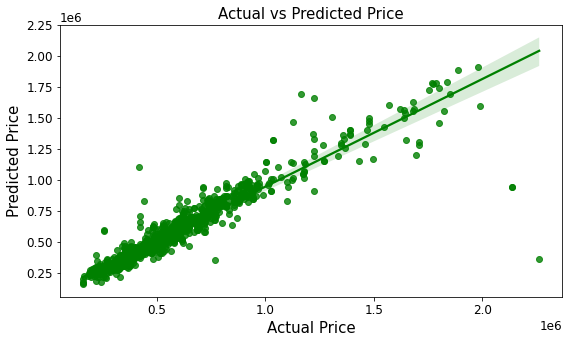

In [224]:
plt.figure(figsize=(9,5))
parameters = {'ytick.labelsize': 12,
          'xtick.labelsize': 12,'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)



sns.regplot(y_test,y_best,color='green')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

## Saving the final Model

In [ ]:
## Saving the best model
import pickle
filename='CarPrice_rfr.pkl'
pickle.dump(gbr_best,open(filename,'wb'))